In [1]:
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
import regex as re
import matplotlib.patches as mpatches

%matplotlib inline 
sns.set(color_codes=True)

<h3> Read Data</h3>
<ul>
<li>Reading the CSV file</li>
<li>Developers and genres are string in format <code>['xxx', 'yyy']</code>.</li>
<li>Split developers and genres string into series using regular expression <code>\s*', '\s*'</code>. <i>TBD: handle <code>"</code></i></li>
<li>List first few lines of data</li>
</ul>

In [2]:
df = pd.read_csv('metacritic-data.csv')
#df, df.columns = df[1:] , df.iloc[0]
df['developers']=df['developers'].str[2:-2].str.split(r"\s*', '\s*")
df['genres']=df['genres'].str[2:-2].str.split(r"\s*', '\s*")
df['user_score'] = df['user_score'].replace('tbd', np.NaN).apply(pd.to_numeric)
df['release_date'] = df['release_date'].apply(pd.to_datetime)
dfPlat = pd.read_csv('platform.csv')
dfPlat.head()
df = pd.merge(df, dfPlat, on='platform')
df.head(6)

,Source.Name.2.1,meta_score,title,platform,release_date,user_score,link,esrb_rating,publisher,developers,genres,num_meta_review,num_user_review,game_img_url,company,platform_type
0,3ds,NaN,Harold Reborn,3DS,2021-05-13,NaN,/game/3ds/harold-reborn,E,Luke Vincent,[Luke Vincent],"[Action, Platformer, 3D]",0.0,NaN,https://static.metacritic.com/images/products/...,Nintendo,Handheld
1,3ds,NaN,Harold's Walk,3DS,2020-12-28,NaN,/game/3ds/harolds-walk,E,Luke Vincent,[Luke Vincent],"[Action, Platformer, 3D]",0.0,NaN,https://static.metacritic.com/images/products/...,Nintendo,Handheld
2,3ds,NaN,The Queen TV-Game 2,3DS,2020-11-26,NaN,/game/3ds/the-queen-tv-game-2,M,Batafurai,[Butterfly],"[Action, Arcade]",0.0,NaN,https://static.metacritic.com/images/products/...,Nintendo,Handheld
3,3ds,NaN,Maze Breaker V,3DS,2020-10-22,NaN,/game/3ds/maze-breaker-v,NaN,nuGAME,[nuGAME],"[Puzzle, General]",0.0,NaN,https://static.metacritic.com/images/products/...,Nintendo,Handheld
4,3ds,NaN,snake3d,3DS,2020-10-01,NaN,/game/3ds/snake3d,NaN,IGOR GAFTON,[IGOR GAFTON],"[Puzzle, General]",0.0,NaN,https://static.metacritic.com/images/products/...,Nintendo,Handheld
5,3ds,NaN,Atlantis-6,3DS,2020-10-01,NaN,/game/3ds/atlantis-6,NaN,IGOR GAFTON,[IGOR GAFTON],"[Action, Shooter, First-Person, Arcade]",0.0,NaN,https://static.metacritic.com/images/products/...,Nintendo,Handheld


Checking the data type

In [3]:
print(df.dtypes)
print(df.shape)
print(df.count())

Source.Name.2.1            object
meta_score                float64
title                      object
platform                   object
release_date       datetime64[ns]
user_score                float64
link                       object
esrb_rating                object
publisher                  object
developers                 object
genres                     object
num_meta_review           float64
num_user_review           float64
game_img_url               object
company                    object
platform_type              object
dtype: object
(60871, 16)
Source.Name.2.1    60871
meta_score         22130
title              60871
platform           60871
release_date       60870
user_score         22001
link               60871
esrb_rating        35230
publisher          60724
developers         59492
genres             60864
num_meta_review    60865
num_user_review    22004
game_img_url       60867
company            60871
platform_type      60871
dtype: int64


Null values check

In [4]:
print(df.isnull().sum())

Source.Name.2.1        0
meta_score         38741
title                  0
platform               0
release_date           1
user_score         38870
link                   0
esrb_rating        25641
publisher            147
developers          1379
genres                 7
num_meta_review        6
num_user_review    38867
game_img_url           4
company                0
platform_type          0
dtype: int64


In [5]:
print(df[['platform', 'publisher', 'company', 'platform_type']].nunique())
print('developer        ', df.developers.explode().nunique())
print('genres        ', df.genres.explode().nunique())

platform            23
publisher        13805
company              7
platform_type        5
dtype: int64
developer         16752
genres         277


Outlier Detect (meta score)

C:\Users\sunlu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sunlu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sunlu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:

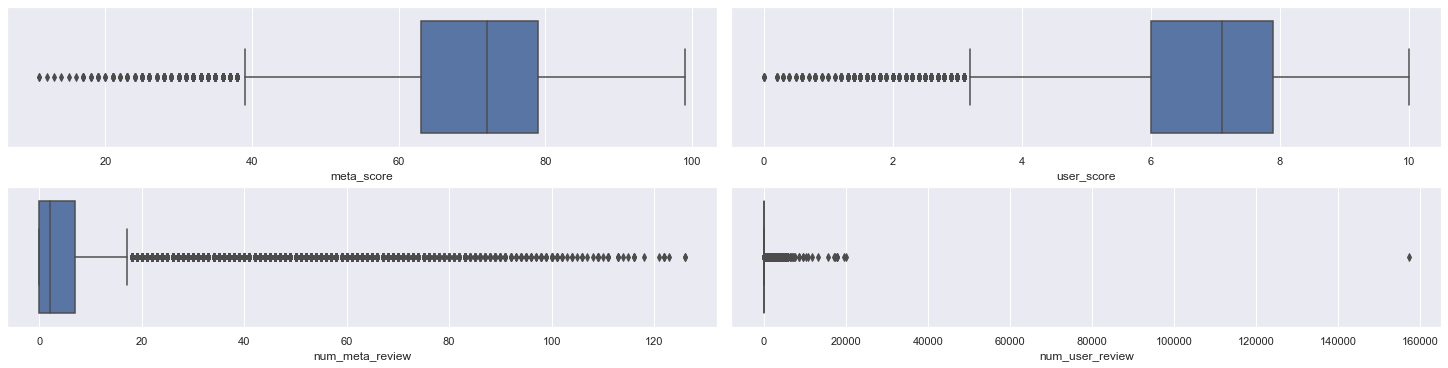

In [6]:
#sns.set(rc={'figure.figsize':(26,4)})
#sns.boxplot(x='meta_score', y='user_score', data=df)
#sns.boxplot(x=df['meta_score'])
#selected = df[["meta_score", "user_score", "num_meta_review", "num_user_review"]]
fig, axs = plt.subplots(2,2, constrained_layout=True, figsize=(20,5))

sns.boxplot(df['meta_score'], ax=axs[0,0])
sns.boxplot(df['user_score'], ax=axs[0,1])
sns.boxplot(df['num_meta_review'], ax=axs[1,0])
sns.boxplot(df['num_user_review'], ax=axs[1,1])
plt.show()


<h3>Histogram</h3>
Counting number of titles per key attributes

<AxesSubplot:title={'center':'ESRB Rating'}>

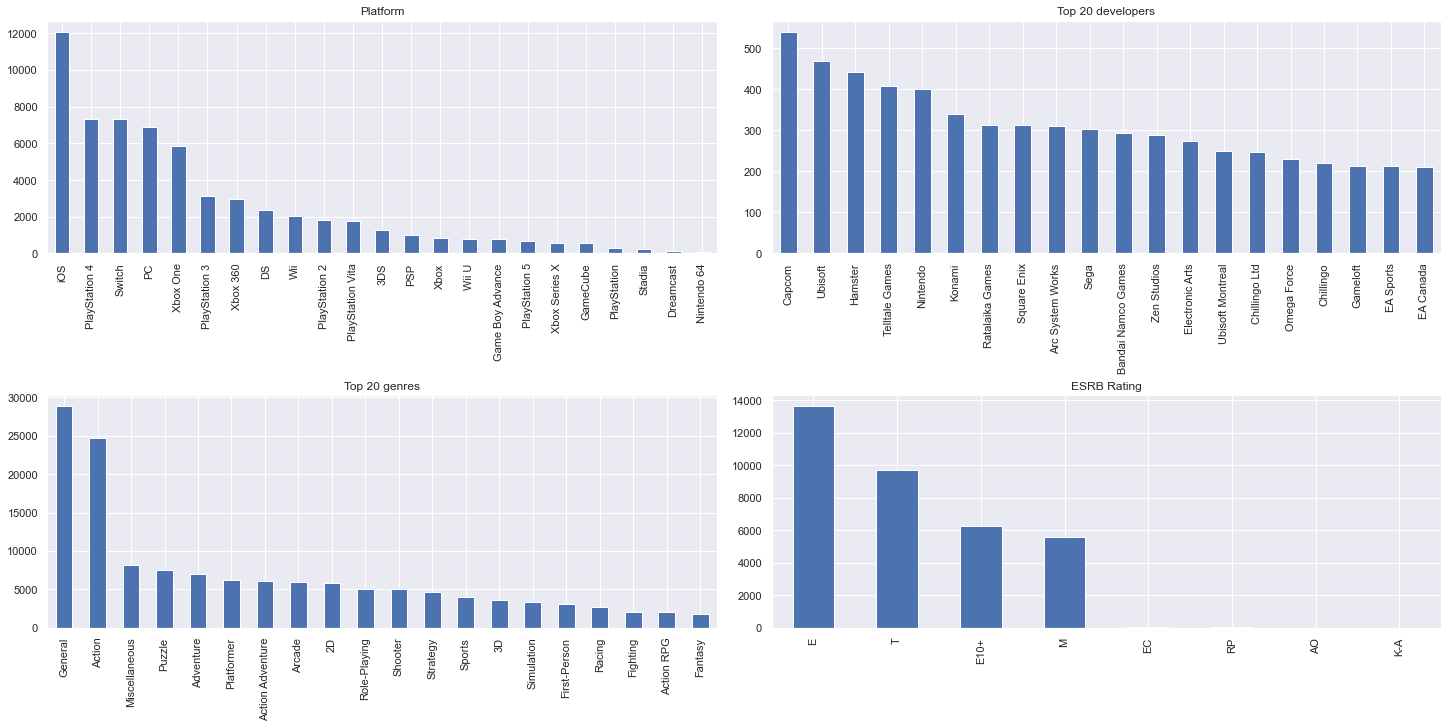

In [7]:
fig, axs = plt.subplots(2,2, constrained_layout=True, figsize=(20,10))

df.platform.value_counts().plot(kind="bar", ax=axs[0,0], title="Platform")

df.developers.explode().value_counts().nlargest(20).plot(kind="bar", ax=axs[0,1], title="Top 20 developers")
df.genres.explode().value_counts().nlargest(20).plot(kind="bar", ax=axs[1,0],title="Top 20 genres")
df.esrb_rating.value_counts().plot(kind="bar", ax=axs[1,1], title="ESRB Rating")


Heat Map
To visual and find out possible relationship among numeric columns

,meta_score,user_score,num_meta_review,num_user_review
meta_score,1.000000,0.499458,0.242786,0.085783
user_score,0.499458,1.000000,0.233131,0.024865
num_meta_review,0.242786,0.233131,1.000000,0.209115
num_user_review,0.085783,0.024865,0.209115,1.000000


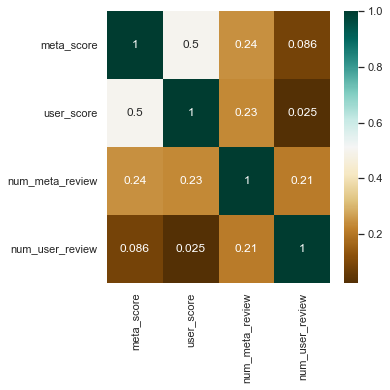

In [8]:
plt.figure(figsize=(5,5))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

Scatterplot

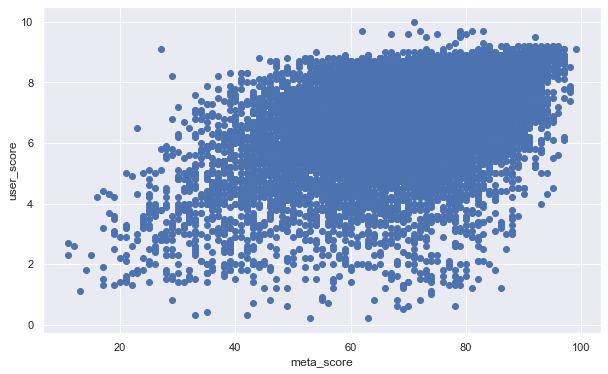

In [9]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['meta_score'], df['user_score'])
ax.set_xlabel('meta_score')
ax.set_ylabel('user_score')
plt.show()

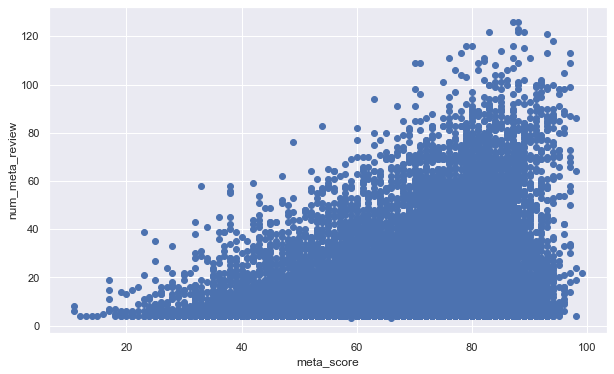

In [10]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['meta_score'], df['num_meta_review'])
ax.set_xlabel('meta_score')
ax.set_ylabel('num_meta_review')
plt.show()

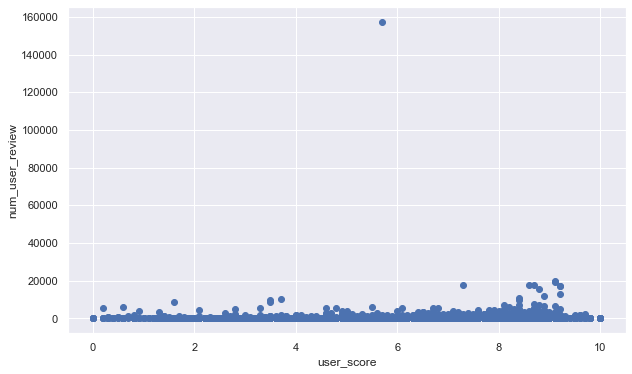

In [11]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['user_score'], df['num_user_review'])
ax.set_xlabel('user_score')
ax.set_ylabel('num_user_review')
plt.show()

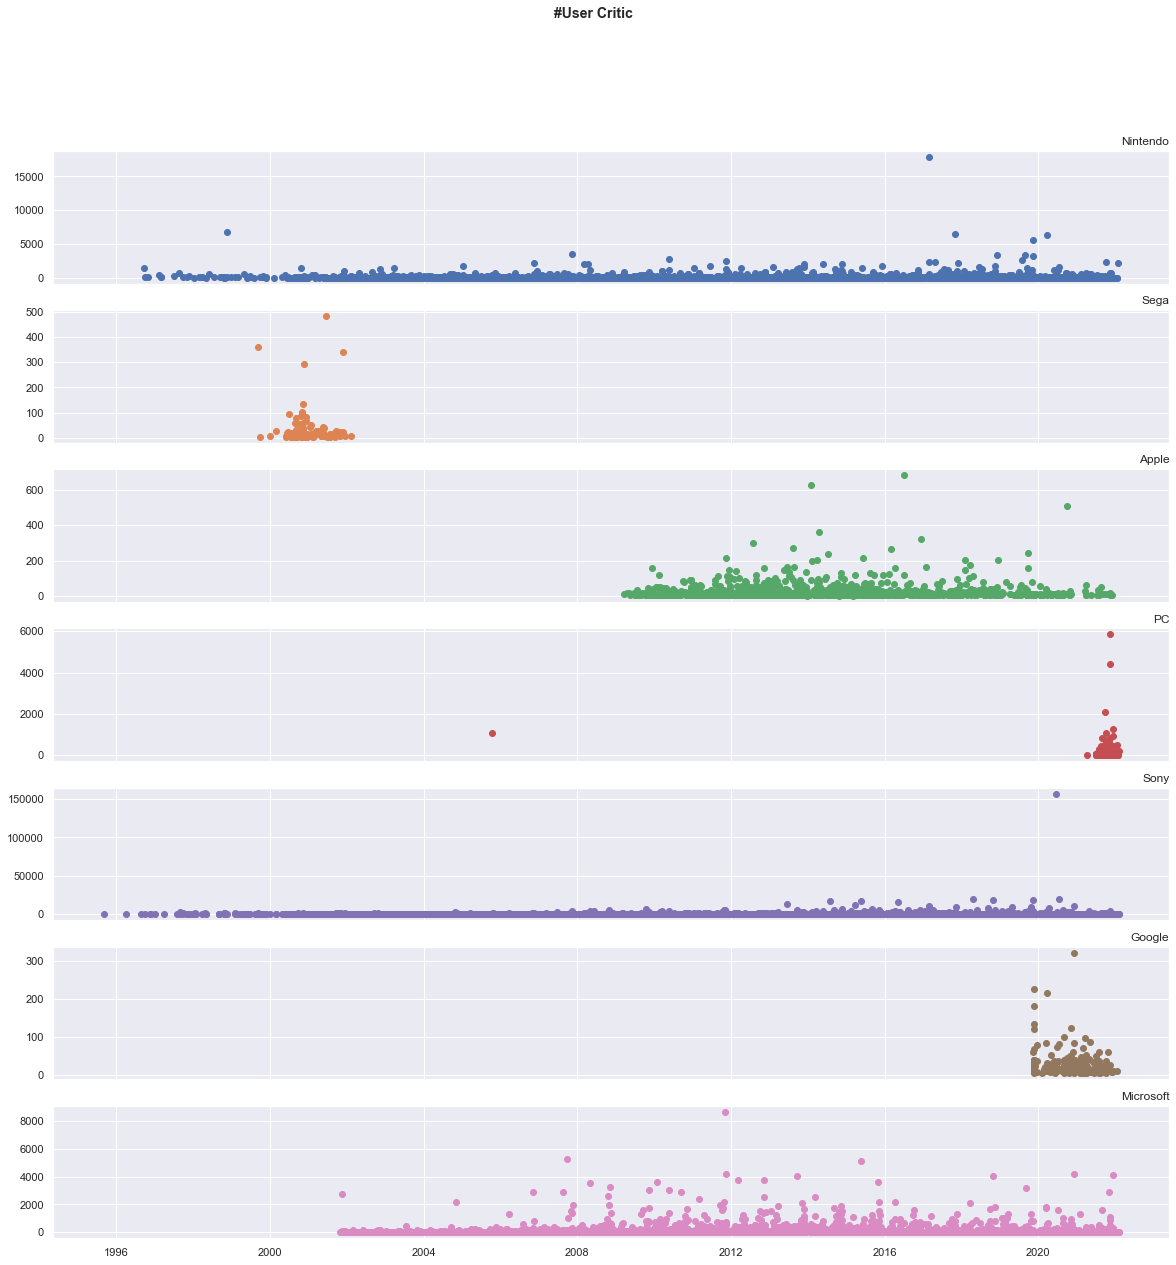

In [12]:
company = df.company.unique()

fig, axs =plt.subplots(company.size, figsize=(20,20), sharex=True)
fig.suptitle('#User Critic', fontsize=14, fontweight='bold')
colors = plt.rcParams["axes.prop_cycle"]()

v = 0
for plat in company:
    dfp = df.loc[df.company == plat]
    c = next(colors)["color"]
    axs[v].plot_date(dfp.release_date, dfp.num_user_review, xdate=True, ydate=False, color=c)
    
    axs[v].set_title(plat, loc="right")
    v=v+1

plt.show()

<h3>Title Insight</h3>
Checking the most favorable titles statistics

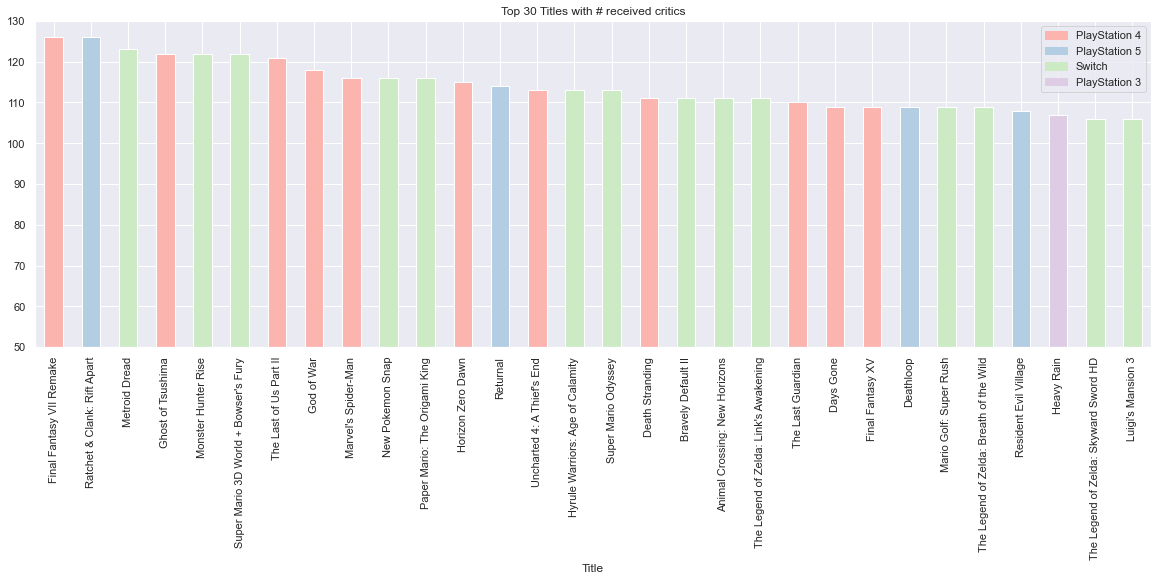

In [13]:

fig, ax1 = plt.subplots(figsize=(20,6))

df20 = df.nlargest(30, "num_meta_review")

color_labels = df20['platform'].unique()
col_values = sns.color_palette('Pastel1')
color_map = dict(zip(color_labels, col_values))
colors = [color_map[label] for label in df20['platform'].values]
df20.plot.bar(title="Top 30 Titles with # received critics", ax=ax1, x='title', y='num_meta_review',color=colors)
ax1.legend(handles=[mpatches.Patch(color=v,label=k) for k,v in color_map.items()])
ax1.set_ylim(50,130)
ax1.xaxis.set_label_text("Title")
plt.show()

<h3>Developers</h3>
Which developer receive the most critics

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


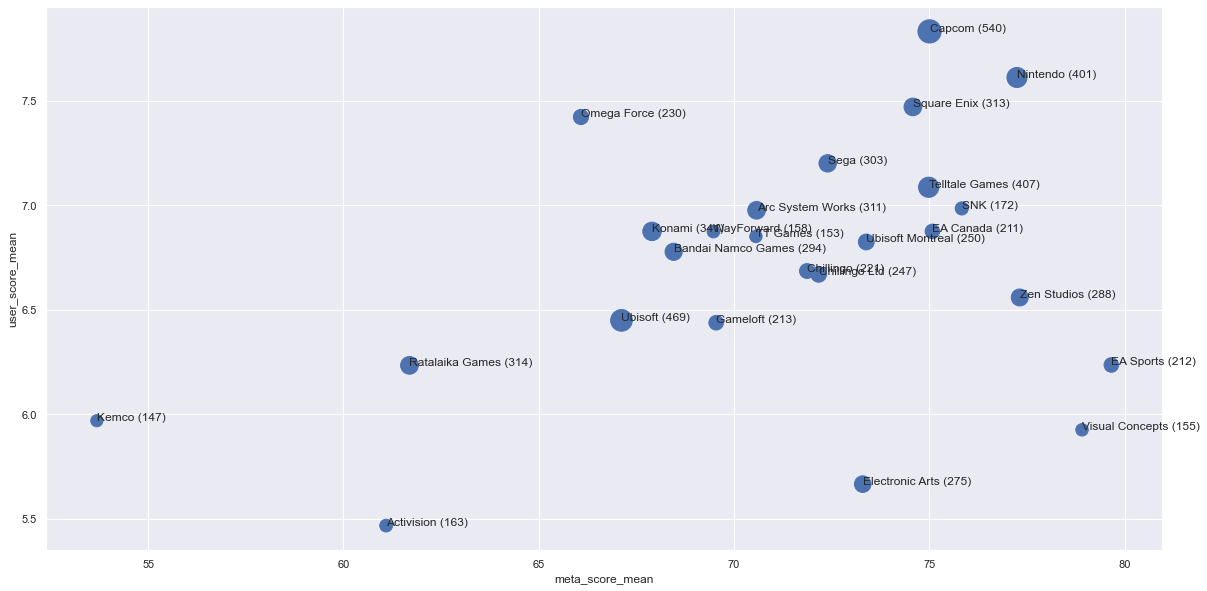

In [38]:

dfe = df.explode('developers').groupby('developers').agg({'meta_score' : ['mean', 'count'], 'user_score' : ['mean', 'count'], 'title' : ['count']}).dropna().sort_values(by=[("title", "count")], ascending=False)
dfe.columns = ['meta_score_mean', 'meta_score_count', 'user_score_mean', 'user_score_count','title_count']
dfe = dfe.reset_index()
dfe = dfe.loc[(dfe.meta_score_count >10)].head(25)
ax = dfe.plot(kind='scatter', x='meta_score_mean', y='user_score_mean', s='title_count',figsize=(20,10))
dfe['label'] = dfe['developers'] + " (" + dfe['title_count'].astype(str) + ")"
dfe[['meta_score_mean','user_score_mean','label']].apply(lambda row: ax.text(*row),axis=1);


It looks like <b>EA Sports</b>, <b>Visual Concepts</b> and <b>Electronic Arts</b> are generally acclaimed by critics but users do not give similar rating. Now drill down to <b>Visual Concepts</b> and check the same scatter for all its titles

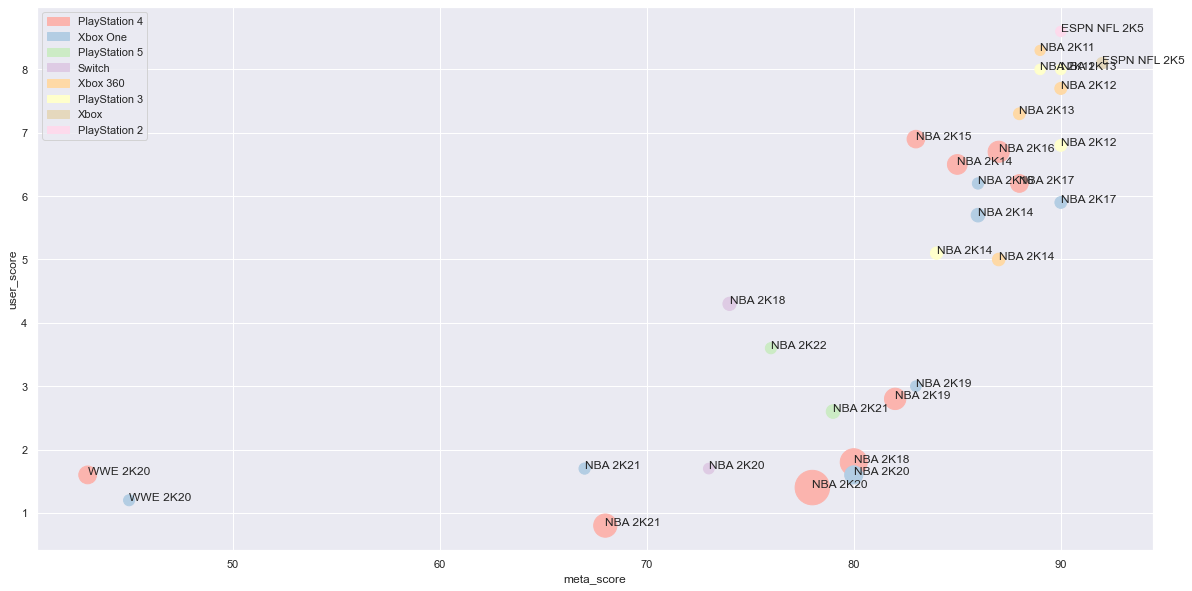

In [19]:
dfx = df.explode('developers')
dfx = dfx.loc[(dfx.developers=='Visual Concepts') & (dfx.meta_score > 0) & (dfx.user_score > 0)].sort_values(by=[("num_user_review")], ascending=False).head(30)

color_labels = dfx['platform'].unique()
col_values = sns.color_palette('Pastel1')
color_map = dict(zip(color_labels, col_values))
colors = [color_map[label] for label in dfx['platform'].values]
ax = dfx.plot(kind='scatter', x='meta_score', y='user_score', s='num_user_review',figsize=(20,10), color=colors)
ax.legend(handles=[mpatches.Patch(color=v,label=k) for k,v in color_map.items()])
dfx[['meta_score','user_score','title']].apply(lambda row: ax.text(*row),axis=1);

The latest title NBA 2K18 - 2K21 have most fall to 80 meta score. However, user rating belows 3. The older titles on the same NBA series is able to retrieve even higher meta score and respect by user score as well. Does it mean user/critics have higher expectation now or the quality is deteriorated? Anyway, trending on for meta score and user score are the same in this sense even the drop rate in user score is much faster.

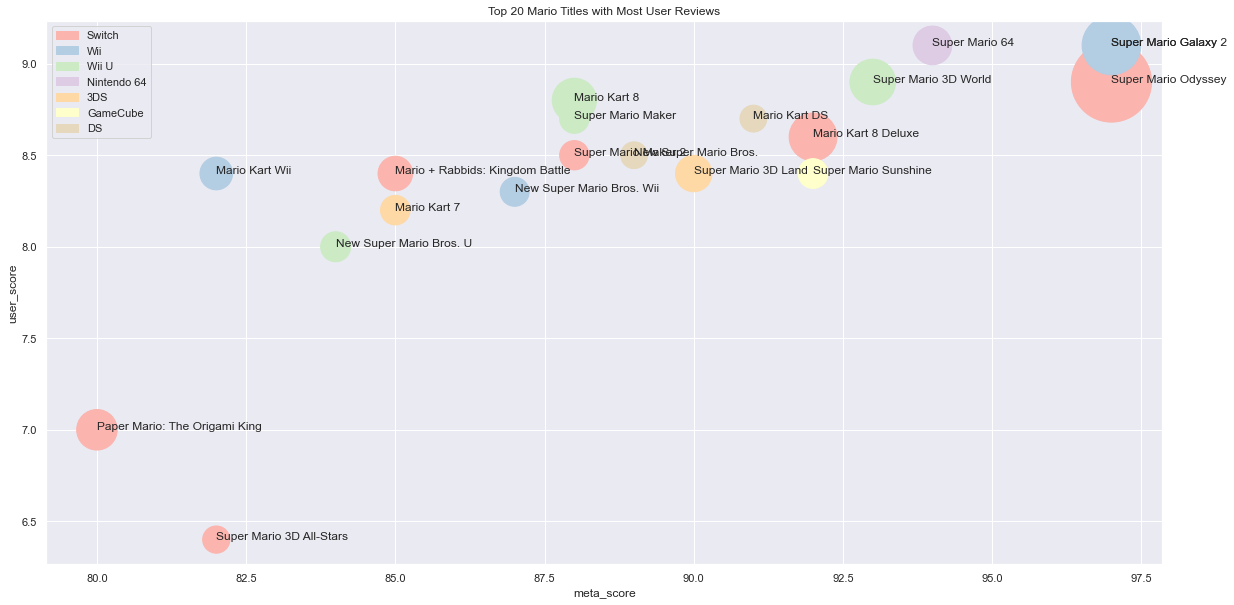

In [43]:
dfx = df[df.title.str.contains("Mario")].sort_values(by=[("num_user_review")], ascending=False).head(20)
color_labels = dfx['platform'].unique()
col_values = sns.color_palette('Pastel1')
color_map = dict(zip(color_labels, col_values))
colors = [color_map[label] for label in dfx['platform'].values]
ax = dfx.plot(kind='scatter', x='meta_score', y='user_score', s='num_user_review',figsize=(20,10), color=colors, title="Top 20 Mario Titles with Most User Reviews")
ax.legend(handles=[mpatches.Patch(color=v,label=k) for k,v in color_map.items()])
dfx[['meta_score','user_score','title']].apply(lambda row: ax.text(*row),axis=1);